<a href="https://github.com/theonaunheim">
    <img style="border-radius: 100%; float: right;" src="static/strawberry_thief_square.png" width=10% alt="Theo Naunheim's Github">
</a>

<br style="clear: both">

<hr>

<div style="display: table; width: 100%">
    <div style="display: table-row; width: 100%;">
        <div style="display: table-cell; width: 50%; vertical-align: middle;">
                <img style="display: inline; overflow: hidden; width: 70%;" src="static/sklearn_logo.png">
            <br>
            <br>
            <ul style="display: inline-block">
                <li>
                    <a href="http://scikit-learn.org/stable/">Scikit-Learn Home</a>
                </li>
                <li>
                    <a href="http://scikit-learn.org/stable/documentation.html">Scikit Documentation and User Guides</a>
                </li>
                <li>
                    <a href="http://scikit-learn.org/stable/modules/classes.html">Scikit API Reference</a>
                </li>
                <li>
                    <a href="https://en.wikipedia.org/wiki/Scikit-learn">Scikit Wikipedia</a>
                </li>
            </ul>
        </div>
        <div style="display: table-cell; width: 10%">
        </div>
        <div style="display: table-cell; width: 40%; vertical-align: middle;">
            <blockquote>
                <p style="font-style: italic;">Essentially, all models are wrong, but some are useful.</p>
                <br>
                <p>-George E. P. Box</p>
            </blockquote>
        </div>
    </div>
</div>

<hr>

## Generally

Scikit-Learn is a Python library that provides a consistent and relatively painless API for a number of common [machine learning](http://scikit-learn.org/stable/modules/classes.html) algorithms. For our purposes, you can think of machine learning as a mechanism to create mathematical models that learn from data.

The Scikit-Learn package provides interfaces for [supervised](https://en.wikipedia.org/wiki/Supervised_learning) and [unsupervised](https://en.wikipedia.org/wiki/Unsupervised_learning) techniques like:
* [Naive Bayes Classifiers](https://en.wikipedia.org/wiki/Naive_Bayes_classifier)
* [Decision Trees](https://en.wikipedia.org/wiki/Decision_tree_learning)
* [Support Vector Machines](https://en.wikipedia.org/wiki/Support_vector_machine)
* [K-Means Clustering](https://en.wikipedia.org/wiki/K-means_clustering)
* [K-Nearest Neighbor](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm)
* [Unoptimized Neural Networks](https://en.wikipedia.org/wiki/Artificial_neural_network)

And supporting functions for things like:
* Ensemble methods ([Random Forests](https://en.wikipedia.org/wiki/Random_forest))
* Model validation / selection ([ROC](https://en.wikipedia.org/wiki/Receiver_operating_characteristic) / [cross-validation](https://en.wikipedia.org/wiki/Cross-validation_(statistics) / [Stochastic Gradient Descent](https://en.wikipedia.org/wiki/Stochastic_gradient_descent))
* Text analysis preprocessing tools [(TF-IDF](https://en.wikipedia.org/wiki/Tf%E2%80%93idf))
* Dimensionality reduction techniques ([PCA](https://en.wikipedia.org/wiki/Principal_component_analysis))
* Hyperparameter tuning ([Exhaustive grid search](https://en.wikipedia.org/wiki/Hyperparameter_optimization))

---




## Caveats

* I am not an expert on machine learning (or on anything else for that matter), so you should view all my claims with suspicion.

* We will not be going into the principles behind these algorithms. If you want to do learn about machine learning from a mathematical perspective, take a look at [Fundementals of Machine Learning for Predictive Data Analytics](https://www.amazon.com/Fundamentals-Machine-Learning-Predictive-Analytics/dp/0262029448).

* If you plan to use machine learning (or models in any capacity) for your employer, you may be subject to model risk management rules.

---

## What will we use sklearn for?

In general, we will use sklearn when we have data and we want to use that data to conduct a classification (where we are determining a category or *discrete variable*) or a regression (where we are looking for a number on a continuous distribution or *continuous* variable.

## How will we use sklearn for supervised learning?

![raw_chart](static/supervised_ml_flowchart_raw.png)

This looks complicated, but it's not hard once you get used to it.

There are two fundemental steps: the creation of a predictive model and the usage of this model to make a prediction.

### Model creation

Ignore everything on the green pathway for now. What we are doing conceptually is taking a set of features (charactaristics of each sample) and matching them up with labels (target item that we will use our model to determine).

So say we want to make classifier that tells Great White Sharks ('SHARK') from Cod fish ('COD'). We go out, we catch some cod and some sharks, we weigh and measure their length.

| Weight (kilos)  | Length (meters)   | Target  |
|---|---|---|
|700|5|SHARK|
|100|2|COD|
|650|4|SHARK|
|90|2|COD|
|600|4|SHARK|

In other words, we take data and translate it into 5 separate [weight, length] feature vectors [[700, 5], [100, 2], [650, 4], [90, 2], [600, 4]]. This is the same length as our target vector with labels: [SHARK, COD, SHARK, COD, SHARK].

For the purposes of this section we will use X to refer to a matrix, and y to refer to the label/target vector.

We plug in our feature vectors (X) and our labels into our machine learning algorithm (along with any hyperparameters, which are non-data elements that speak to how the machine learning algorithm itself will operate). Our output is a predictive model.

The data we use to train the algorithm is called the *training data set*. It is separate from our *testing data set*.

### Prediction

With this model, we can then take a feature vector and predict what class/target/label it will belong to. So for example, if we had

| Weight (kilos)  | Length (meters)   |
|---|---
|600|3|
|80|1|
|650|5|

Intuitively, we can see we should get out [SHARK, COD, SHARK].

The data we use to make predictions is the *test data set*. We separate training and testing data to prevent [overfitting](https://en.wikipedia.org/wiki/Overfitting).

---

## How do we interact with Sklearn?

![annotated_chart](static/supervised_ml_flowchart_annotated.png)


### Model Creation

First, we take our inputs, and if necessary we `fit_transform()` them into our feature vectors that the machine learning algorithm can digest. Certain types of data, such as text, must be transformed into numbers. Other types of algorithms work better when [normalized](https://en.wikipedia.org/wiki/Feature_scaling). Generally, models will take numpy array objects filled with numbers.

Second, we `fit()` our data (X) and labels (y) with our algorithm, which gives us our model.

### Model Prediction

First we take our inputs for the items we want to predict. We `fit_transform()` them into vectors if necessary, and then we use the `predict()` to determine the predicted classification.

---

In [1]:
## Here we will use a simple logistic regression.
# https://en.wikipedia.org/wiki/Logistic_regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import sklearn
%matplotlib inline
matplotlib.style.use('fivethirtyeight')

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

###
# First we create the model
###

# First we instantiate/create the model we want to use
# You supply usually supply model parameters at creation
log_reg = LogisticRegression(random_state=True)

# Then we add a scalar (optional)
scaler = StandardScaler()

# Input data manually (never do this) as 5 samples of 2 features 
train_data = np.array([[700.0, 5.0],
                       [100.0, 2.0],
                       [650.0, 5.0],
                       [ 80.0, 2.0],
                       [600.0, 3.0]])

# Normalize data for analysis.
train_vectors = scaler.fit_transform(train_data)
print('Normalized data:\n')
print(train_vectors)

# Set up our targets manually (never do this)
targets = np.array(['SHARK', 'COD', 'SHARK', 'COD', 'SHARK'])

# Then we fit our model to the data
log_reg.fit(train_vectors, targets)

Normalized data:

[[ 0.9919206   1.17953565]
 [-1.18016831 -1.03209369]
 [ 0.81091319  1.17953565]
 [-1.25257127 -1.03209369]
 [ 0.62990578 -0.29488391]]


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=True, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [2]:
###
# Second we make our predictions
###

# Put above data into vectors manually
test_data = np.array([[600.0, 3.6], 
                      [ 80.0, 1.5], 
                      [650.0, 4.5]])

# Fit transform so our inputs are on the same scale
test_vectors = scaler.fit_transform(test_data)

# Run a basic prediction of our three entries
prediction = log_reg.predict(test_vectors)

# Get proababilities of our three entries
probabilities = log_reg.predict_proba(test_vectors)

# Get classes
classes = log_reg.classes_

# Get coefficients
coefficients = log_reg.coef_

print(prediction, '\n')
print(log_reg.coef_, '\n')

pd.DataFrame(data=probabilities, columns=log_reg.classes_)

['SHARK' 'COD' 'SHARK'] 

[[0.91609221 0.61270943]] 



,COD,SHARK
0,0.267184,0.732816
1,0.865650,0.134350
2,0.164463,0.835537


(-3, 3)

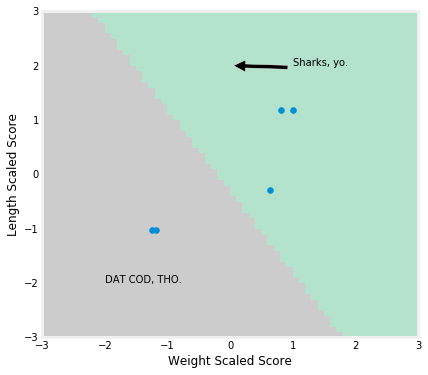

In [3]:
# Plot decision boundary to help visualize.
x = np.arange(-3, 4, .1)
y = np.arange(-3, 4, .1)
# Create meshgrid
xx, yy = np.meshgrid(x, y)

# Calculate for each value on the grid
Z = log_reg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

# Turn cod and shark into numeric features
np.place(Z, Z == 'COD', '001')
np.place(Z, Z == 'SHARK', '00000')
Z = Z.astype(int)

# Graph mesh and scatter.
plt.figure(1, figsize=(6, 6))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Pastel2)
plt.scatter(train_vectors.T[0], train_vectors.T[1])

# Add text for clarity
plt.annotate('Sharks, yo.', (0, 2), (1,2), arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('DAT COD, THO.', (-2, -2))
plt.gca().set_xlabel('Weight Scaled Score')
plt.gca().set_ylabel('Length Scaled Score')
plt.gca().set_xlim(-3, 3)
plt.gca().set_ylim(-3, 3)

## Pipelines

You will interact with most sklearn estimators in a stanrdard way. You will `fit()` or `fit_transform()`, and then you'll `predict()`. Because these estimators perform in a similar way, we can put these estimators into "pipelines" that can be treated as functional units.

To show you the benefits of pipelines, we will be creating a text classifier from publically availible CFPB data.

In [4]:
import pandas as pd

# Create df
df = pd.read_csv('data/cfpb.csv')

# Lets use product as the identifier
df = df[['Product', 'Consumer complaint narrative']]
df.head(5)

,Product,Consumer complaint narrative
0,Credit card or prepaid card,"I was offered a XXXX XXXX "" Gold ' Credit Card..."
1,Credit card,I have been in contact with the Citibank to se...
2,"Credit reporting, credit repair services, or o...",This debt was discharged in my chp XXXX and is...
3,"Credit reporting, credit repair services, or o...",I HAVE WRITTEN TO THE CREDIT BUREAUS IN REGARD...
4,"Credit reporting, credit repair services, or o...",There are quite a few inaccuracies that i have...


In [5]:
###
# Create Pipeline
###

# First we import the Pipeline class
from sklearn.pipeline import Pipeline

# Import vectorizer
# This translate words into vectors (one dimension per word)
from sklearn.feature_extraction.text import CountVectorizer

# Import TFIDF scaler: https://en.wikipedia.org/wiki/Tf%E2%80%93idf
# This helps adjust for word frequency and importance
from sklearn.feature_extraction.text import TfidfTransformer

# Import Stochastic Gradient Decent classifier
from sklearn.linear_model import SGDClassifier

# Now make our pipeline
# Supply our pipeline name and process
pipeline = Pipeline([('vec', CountVectorizer()),
                     ('trans', TfidfTransformer()),
                     ('clf', SGDClassifier(loss='log', max_iter=5))])

pipeline

Pipeline(memory=None,
     steps=[('vec', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_...='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False))])

In [6]:
###
# Fit our text to our pipeline
###

# Complaint vector (notice pandas to numpy translation)
text_vec = df['Consumer complaint narrative']

# Type of product vector
target_vec = df['Product']

# These pipeline meta esimators only require fit() and predict()
pipeline.fit(text_vec, target_vec)

Pipeline(memory=None,
     steps=[('vec', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_...='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False))])

In [7]:
dummy_complaints = ['Bank of America are such jerks. They screwed up my mortgage payments and then put me out of my home. I tried to get a loan modification program under HAMP but they screwed that up to.',
                    'JPMorgan Chase is the devil. My credit card was fraudulently used and my line of credit was screwed up and my credit score.',
                    'Wells Fargo\'s logo is a stupid color. Red and yellow is an ugly combo for a bank.']
                    
pipeline.predict(dummy_complaints)

array(['Mortgage', 'Credit card', 'Bank account or service'], dtype='<U76')

## Validation

Sklearn also has tools for helping us validate how good our models are.

---

In [8]:
# Import convenience method for spliting dataset
from sklearn.model_selection import train_test_split

# Import basic accuracy score
from sklearn.metrics import accuracy_score

# Randomly divide into train and test
train, test = train_test_split(df, test_size=.2)

train_X = train['Consumer complaint narrative']
train_y = train['Product']
test_X = test['Consumer complaint narrative']
test_y = test['Product']

print('{} training samples.'.format(len(train_X)))
print('{} testing samples.'.format(len(test_X)))

# We need to re-fit our pipeline to our training data
pipeline.fit(train_X, train_y)

# Conduct a simple accuracy score. First predict
predicted_test_y = pipeline.predict(test_X)
true_test_y = test_y

# Types of scores here: http://scikit-learn.org/stable/modules/model_evaluation.html
score = accuracy_score(true_test_y, predicted_test_y)
print('Our accuracy score was {:.1%}.'.format(score))

# This is essentially calculating the percent of correct predictions.
pd.DataFrame({'Predicted': predicted_test_y,
              'True': true_test_y}).head(5)

8000 training samples.
2000 testing samples.
Our accuracy score was 65.8%.


,Predicted,True
1268,Student loan,Student loan
1333,Bank account or service,Bank account or service
4524,Debt collection,"Credit reporting, credit repair services, or o..."
7500,Bank account or service,Bank account or service
1063,Credit reporting,Credit reporting


In [9]:
# We can also use the built in cross validation tools
# https://en.wikipedia.org/wiki/Cross-validation_(statistics)

# Import cross validation score
from sklearn.model_selection import cross_val_score

# Because this will create and test our model 3 times, a data subset to ease comutation
subset = df.sample(frac=.5)

# This takes our model and data, outputs series of scores
cvs = cross_val_score(# model
                      pipeline,
                      # Features
                      subset['Consumer complaint narrative'],
                      # Target
                      subset['Product'],
                      # Number of folds
                      cv=3,
                      # Scoring methodology
                      scoring='f1_micro')

print(cvs)
print(cvs.mean())

C:\Users\theon\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


[0.6481149  0.64028777 0.6345575 ]
0.6409867221751843


## Hyperparameter selection

We can do an exhaustive grid search of hyperparameters, and get the best model. The built in sklearn estimators all have loss functions baked in.

In [10]:
# This takes a long time. Skipping.
from sklearn.model_selection import GridSearchCV

# Remember what our pipeline looks like:
pipeline = Pipeline([('vec', CountVectorizer()),
                     ('trans', TfidfTransformer()),
                     ('clf', SGDClassifier(loss='log', max_iter=5))])

# Put all the parameters we want to search through in a dict
parameters = {'vec__ngram_range': [(1, 1)],
              'trans__use_idf': (True, False),
              'clf__loss': ['hinge']}

# Setup a meta-classifier
optimized_clf = GridSearchCV(pipeline, parameters, n_jobs=1)

# Fit metaclassifier
optimized_clf.fit(df['Consumer complaint narrative'],
                  df['Product'])

# Use best model as a predictor
print(optimized_clf.predict(['I hate Citibank because they screwed up my mortgage']))

# Get best parameters
print(optimized_clf.best_params_)

['Mortgage']
{'clf__loss': 'hinge', 'trans__use_idf': True, 'vec__ngram_range': (1, 1)}


## Which models should I use?

There are entire books devoted to this topic. The below chart was created as a joke by the sklearn community, but it's not actually half bad. When in doubt, test all your models and choose the one that performs best.

![Scikit Model Chart](static/ml_map.png)

---

## Links
* ### [Scikit-Learn Getting Started](http://ogrisel.github.io/scikit-learn.org/sklearn-tutorial/tutorial/text_analytics/general_concepts.html)
* ### [Scikit-Learn Tutorials](http://scikit-learn.org/stable/tutorial/)
* ### [PyCon 2015: Getting Started With Scikit-Learn (Part 1)](https://www.youtube.com/watch?v=HC0J_SPm9co)
* ### [PyCon 2015: Getting Started with Scikit-Learn (Part 2)](https://www.youtube.com/watch?v=oGqGxvqA9-k)
* ### [Scikit-Learn Text Tutorial](http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html)

---

# Next Up: [Other Useful Stuff](9_other.ipynb)

---